# Optimization Project

In [1]:
!pip install ucimlrepo

In [2]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Mon Jul 17 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53f0fbb42

## Breast Cancer Wisconsin Diagnostic Dataset

### Overview

The Breast Cancer Wisconsin Diagnostic dataset is a widely used dataset for breast cancer classification. It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The goal is to predict whether a tumor is malignant (cancerous) or benign (non-cancerous) based on these features.

### Dataset Details

- **Number of Instances:** 569
- **Number of Features:** 31 numeric, real-valued features

### Features

The dataset comprises 30 real-valued features computed for each cell nucleus. These features are categorized into three groups:
- **Mean Features (10):** These features represent the mean value of measurements for each cell nucleus. They include:
  1. Radius (mean of distances from the center to points on the perimeter)
  2. Texture (standard deviation of gray-scale values)
  3. Perimeter
  4. Area
  5. Smoothness (local variation in radius lengths)
  6. Compactness (perimeter^2 / area - 1.0)
  7. Concavity (severity of concave portions of the contour)
  8. Concave Points (number of concave portions of the contour)
  9. Symmetry
  10. Fractal Dimension ("coastline approximation" - 1)

- **Standard Error Features (10):** These features represent the standard error of measurements. They are calculated for each cell nucleus and include the same parameters as the mean features.

- **Worst (Largest) Features (10):** These features represent the mean of the three largest values of the features for each cell nucleus. They include the same parameters as the mean and standard error features.

### Class Distribution

The dataset consists of two classes:
- Malignant (M): 212 samples
- Benign (B): 357 samples

### Usage

This dataset is often used for binary classification tasks, especially in the context of breast cancer diagnosis. Machine learning models are trained on this dataset to predict whether a tumor is malignant or benign based on the computed features.

### Source
[UCI Machine Learning Repository - Breast Cancer Wisconsin Diagnostic](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


In [4]:
X = X.values
y = y.values

In [5]:
def normalize_features(input_data):
    return StandardScaler().fit_transform(input_data)


def one_hot_label_encoder(input_data):
    return OneHotEncoder().fit_transform(input_data.reshape(-1, 1)).toarray()


X = normalize_features(X)
y = one_hot_label_encoder(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [7]:
def plot_loss_curve(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()
    return


def plot_accuracy_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()
    return


def plot_confusion_matrix(dnn_model, features, targets, classes):
    y_test_preds = dnn_model.predict(features, verbose='auto', steps=test_steps)
    y_test_preds = np.argmax(y_test_preds, axis=1)
    y_test = np.argmax(targets, axis=1)
    cm = confusion_matrix(y_test, y_test_preds, labels=[0, 1])
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.colorbar()
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

In [8]:
batch_size = 16

train_steps = np.ceil(X_train.shape[0] / batch_size)
test_steps = np.ceil(X_test.shape[0] / batch_size)
val_steps = np.ceil(X_val.shape[0] / batch_size)

# SGD as optimizer

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


In [11]:
precision_metric = tf.keras.metrics.Precision()
recall_metric = tf.keras.metrics.Recall()

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [13]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=60, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, verbose='auto')

Epoch 1/60
31/31 [==============================] - 4s 11ms/step - loss: 0.6932 - accuracy: 0.6337 - precision: 0.6052 - recall: 0.5741 - val_loss: 0.6610 - val_accuracy: 0.5741 - val_precision: 0.5833 - val_recall: 0.5185
Epoch 2/60
31/31 [==============================] - 0s 4ms/step - loss: 0.6334 - accuracy: 0.6337 - precision: 0.6752 - recall: 0.5947 - val_loss: 0.6085 - val_accuracy: 0.5741 - val_precision: 0.7250 - val_recall: 0.5370
Epoch 3/60
31/31 [==============================] - 0s 4ms/step - loss: 0.5629 - accuracy: 0.6337 - precision: 0.7423 - recall: 0.6461 - val_loss: 0.5362 - val_accuracy: 0.5741 - val_precision: 0.7391 - val_recall: 0.6296
Epoch 4/60
31/31 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.7675 - precision: 0.7960 - recall: 0.7387 - val_loss: 0.4610 - val_accuracy: 0.8148 - val_precision: 0.8163 - val_recall: 0.7407
Epoch 5/60
31/31 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8909 - precision: 

In [14]:
def get_f1_score(p, r):
    precision = p.result().numpy()
    recall = r.result().numpy()
    return 2 * (precision * recall) / (precision + recall)

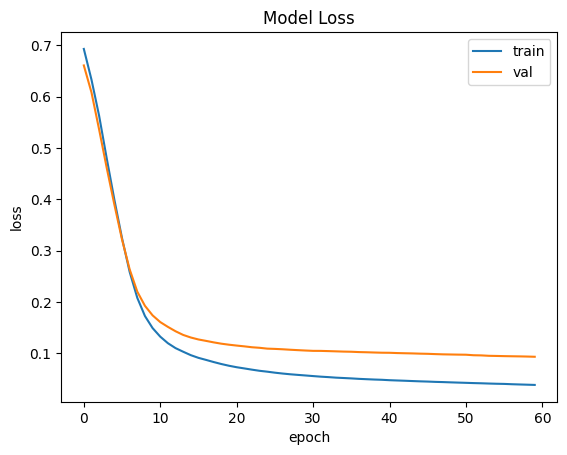

In [15]:
plot_loss_curve(model_history)

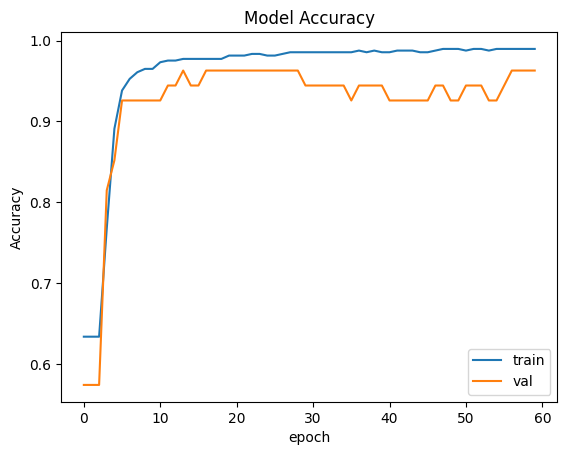

In [16]:
plot_accuracy_curve(model_history)

In [17]:
model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

2/2 [==============================] - 0s 7ms/step - loss: 0.1844 - accuracy: 0.9655 - precision: 0.9655 - recall: 0.9655
DNN model classifier evaluation results:

Test set Loss = 0.18440
Test set Accuracy = 0.97
Test set Precision = 0.97
Test set Recall = 0.97
Test set F1 Score = 0.97


2/2 [==============================] - 0s 4ms/step


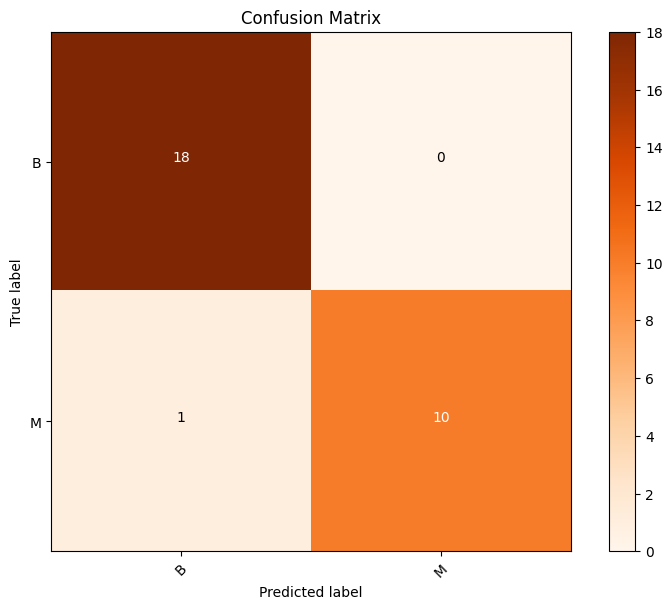

In [18]:
plot_confusion_matrix(model, X_test, y_test, classes=['B', 'M'])

# Frank-Wolfe with L1 ball as feasible region as optimizer

In [19]:
# model_2 = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(8, activation='relu'),
#     tf.keras.layers.Dense(2, activation='sigmoid')
# ])

In [20]:
# model_2.summary()

In [21]:
# precision_metric = tf.keras.metrics.Precision()
# recall_metric = tf.keras.metrics.Recall()

In [22]:
# class FrankWolfe(tf.keras.optimizers.Optimizer):
#     pass

In [23]:
# model_2.compile(
# #     optimizer=tf.keras.optimizers.SGD(learning_rate=0.008),
#     loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#     metrics=['accuracy', precision_metric, recall_metric])